In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install statsmodels
%pip install matplotlib
%pip install openpyxl
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

<Figure size 1200x600 with 0 Axes>

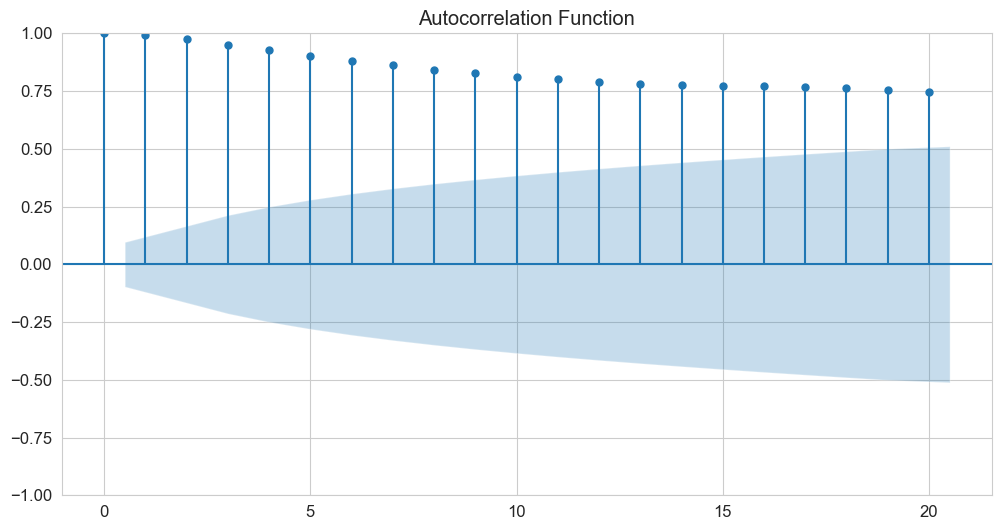

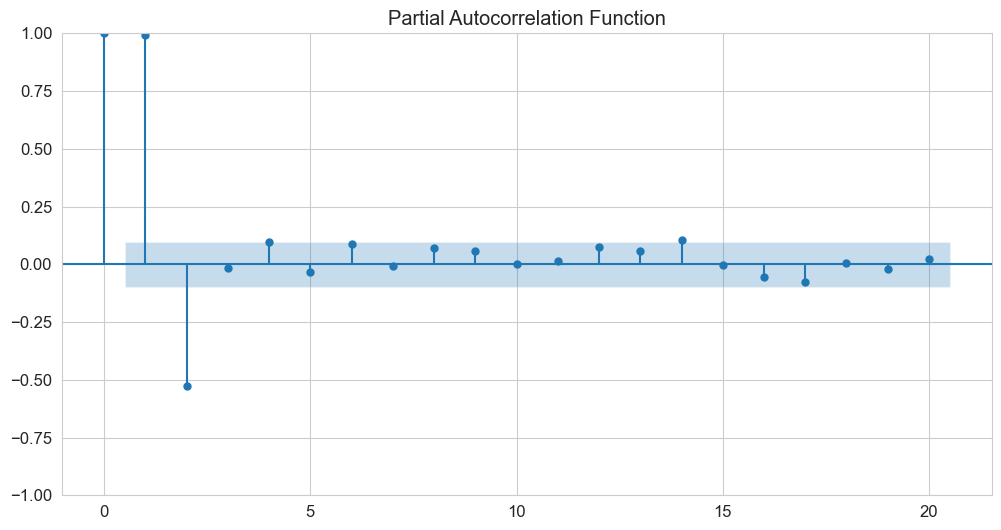

Order: (1, 1, 1), Seasonal Order: (1, 1, 1, 12)


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                pfr   No. Observations:                  412
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3516.564
Date:                            Mon, 24 Mar 2025   AIC                           7043.127
Time:                                    17:30:30   BIC                           7063.072
Sample:                                02-09-2015   HQIC                          7051.027
                                     - 12-26-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5071      0.078      6.469      0.000       0.353       0.661
ma.L1         -0.0222      0.086   

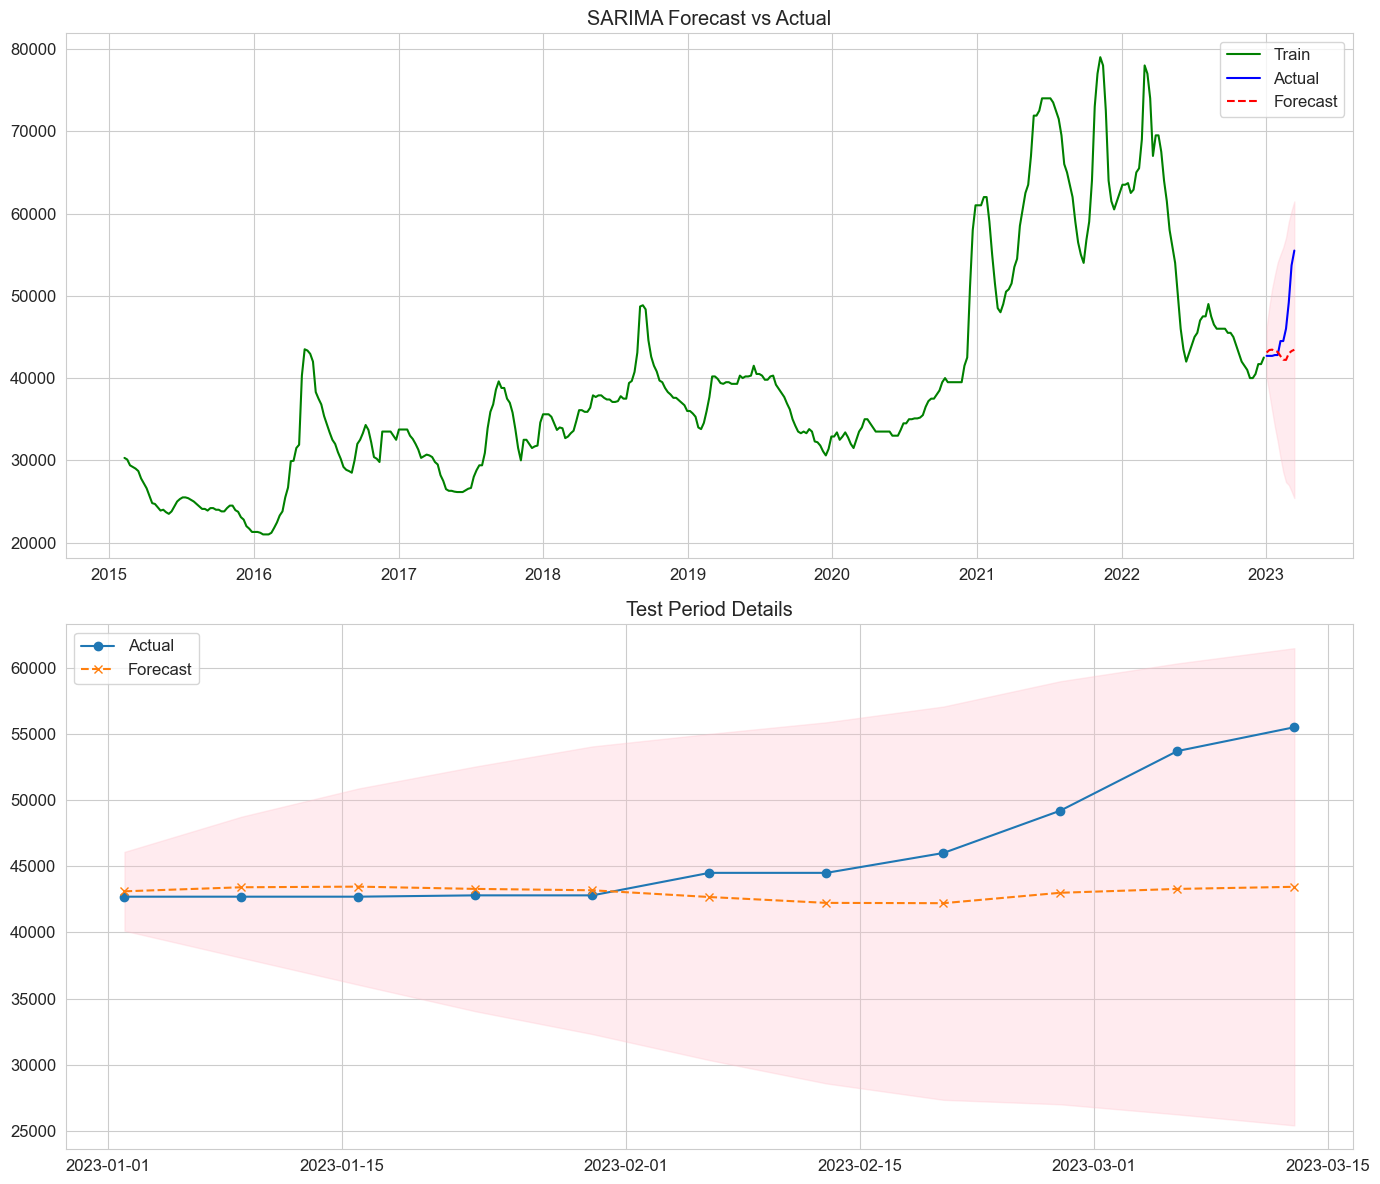

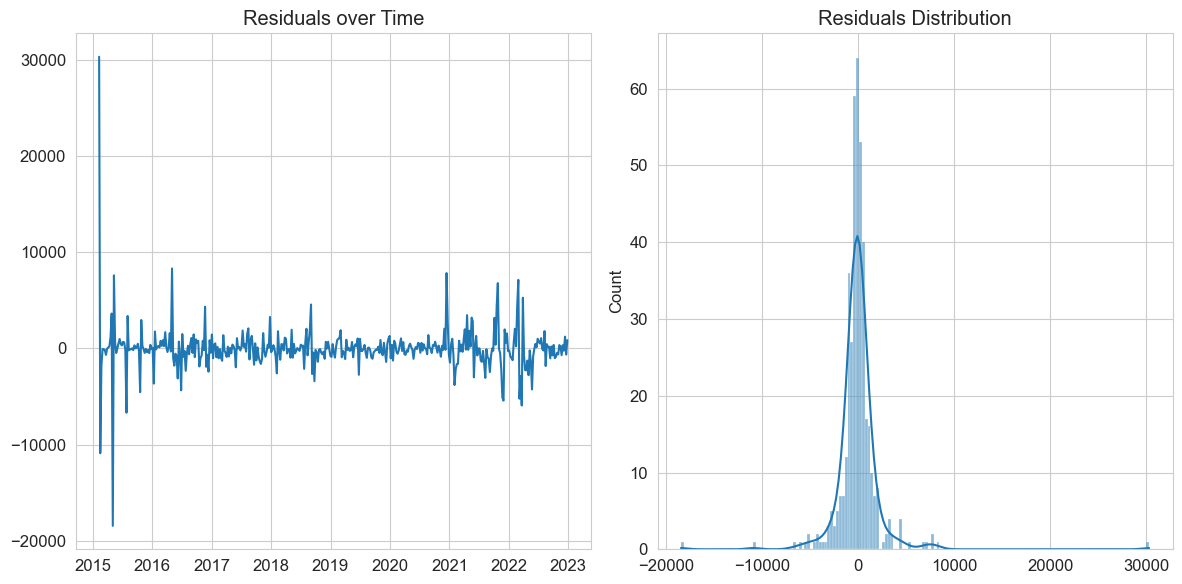

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Настройка стиля графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Загрузка и подготовка данных
def load_and_prepare_data(filepath):
    data = pd.read_csv(filepath)
    data['dt'] = pd.to_datetime(data['dt'])
    data.set_index('dt', inplace=True)
    return data['pfr']  # SARIMA работает с одномерными рядами

# Разделение данных
def split_data(data, test_size=11):
    train = data.head(-test_size)
    test = data.tail(test_size)
    return train, test

# Подбор параметров SARIMA (упрощенная версия)
def find_sarima_params(series, seasonal_period=12):
    # Графики ACF/PACF для подбора параметров
    plt.figure(figsize=(12, 6))
    plot_acf(series, lags=20)
    plt.title('Autocorrelation Function')
    plt.show()
    
    plot_pacf(series, lags=20)
    plt.title('Partial Autocorrelation Function')
    plt.show()
    
    # Базовые параметры (в реальном проекте используйте auto_arima)
    order = (1, 1, 1)            # (p, d, q)
    seasonal_order = (1, 1, 1, seasonal_period)  # (P, D, Q, s)
    return order, seasonal_order

# Обучение модели SARIMA
def train_sarima_model(train_series, order, seasonal_order):
    model = SARIMAX(train_series, 
                   order=order, 
                   seasonal_order=seasonal_order)
    fitted_model = model.fit(disp=False)
    print(fitted_model.summary())
    return fitted_model

# Прогнозирование и оценка модели
def evaluate_sarima_model(model, test_series):
    forecast = model.get_forecast(steps=len(test_series))
    y_pred = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    mae = mean_absolute_error(test_series, y_pred)
    rmse = np.sqrt(mean_squared_error(test_series, y_pred))
    
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    return y_pred, conf_int

# Визуализация результатов
def plot_sarima_results(train_series, test_series, y_pred, conf_int):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
    
    # Полный график
    ax1.plot(train_series.index, train_series, label='Train', color='green')
    ax1.plot(test_series.index, test_series, label='Actual', color='blue')
    ax1.plot(test_series.index, y_pred, label='Forecast', color='red', linestyle='--')
    ax1.fill_between(test_series.index, 
                    conf_int.iloc[:, 0], 
                    conf_int.iloc[:, 1], 
                    color='pink', alpha=0.3)
    ax1.set_title('SARIMA Forecast vs Actual')
    ax1.legend()
    
    # Тестовый период
    ax2.plot(test_series.index, test_series, label='Actual', marker='o')
    ax2.plot(test_series.index, y_pred, label='Forecast', marker='x', linestyle='--')
    ax2.fill_between(test_series.index, 
                    conf_int.iloc[:, 0], 
                    conf_int.iloc[:, 1], 
                    color='pink', alpha=0.3)
    ax2.set_title('Test Period Details')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Анализ остатков
def plot_residuals(model):
    residuals = model.resid
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.plot(residuals)
    plt.title('Residuals over Time')
    
    plt.subplot(122)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    
    plt.tight_layout()
    plt.show()

# Основной процесс
def main():
    # Загрузка данных
    series = load_and_prepare_data('data_combined_proto.csv')
    
    # Разделение данных
    train, test = split_data(series)
    
    # Подбор параметров SARIMA
    order, seasonal_order = find_sarima_params(train, seasonal_period=12)
    print(f"Order: {order}, Seasonal Order: {seasonal_order}")
    
    # Обучение модели
    model = train_sarima_model(train, order, seasonal_order)
    
    # Оценка модели
    y_pred, conf_int = evaluate_sarima_model(model, test)
    
    # Визуализация
    plot_sarima_results(train, test, y_pred, conf_int)
    plot_residuals(model)

if __name__ == "__main__":
    main()